<a href="https://colab.research.google.com/github/Jane-MinjiKim/20-2_DeepLearning/blob/main/201008_DL_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/g')

Mounted at /content/g


In [2]:
!mkdir -p ~/.kaggle
!cp "/content/g//My Drive/Kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 33.1MB/s]
 93% 251M/271M [00:04<00:00, 64.2MB/s]
100% 271M/271M [00:04<00:00, 69.5MB/s]
 99% 537M/543M [00:05<00:00, 117MB/s]
100% 543M/543M [00:05<00:00, 100MB/s]


In [5]:
!unzip train.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      
  inflating: t

In [6]:
import os, shutil

#원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '/content/train'

#소규모 데이터셋을 저장할 디렉토리
base_dir = '/content/g//My Drive/content/datasets/cats_and_dogs_small_2'
os.mkdir(base_dir)

#훈련, 검증, 테스트 분할을 위한 디렉토리
train_dir = os.path.join(base_dir, 'train') # /content/g//My Drive/content/datasets/cats_and_small_2 하위에 'train'폴더 생성
os.mkdir(train_dir)  # train_dir 경로로 디렉토리 생성

# train, validation, test 라는 하위폴더 생성
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [7]:
# 훈련용 고양이 사진 디렉토리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉토리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉토리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉토리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉토리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉토리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [8]:
# train, validation, test 폴더 안에서 강아지, 고양이로 나누어 폴더 생성
# train: 이미지 1000개 받아옴 / validation: 500개 받아옴 / test: 500개 받아옴

# 처음 강아지 이미지 1000개를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

# 다음 강아지 이미지 500개를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

# 다음 강아지 이미지 500개를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

# 처음 고양이 이미지 1000개를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

# 다음 고양이 이미지 500개를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

# 다음 고양이 이미지 500개를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [9]:
# Convolution Nueral Network 구성하기
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# 데이터 전처리

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 97s 965ms/step - loss: 0.6901 - acc: 0.5365 - val_loss: 0.6778 - val_acc: 0.5660
Epoch 2/30
100/100 [==============================] - 93s 928ms/step - loss: 0.6922 - acc: 0.5285 - val_loss: 0.6719 - val_acc: 0.6030
Epoch 3/30
100/100 [==============================] - 92s 922ms/step - loss: 0.6827 - acc: 0.5570 - val_loss: 0.6698 - val_acc: 0.5640
Epoch 4/30
100/100 [==============================] - 92s 920ms/step - loss: 0.6473 - acc: 0.6090 - val_loss: 0.6283 - val_acc: 0.6370
Epoch 5/30
100/100 [==============================] - 93s 927ms/step - loss: 0.6186 - acc: 0.6595 - val_loss: 0.5877 - val_acc: 0.7030
Epoch 6/30
100/100 [==============================] - 92s 924ms/step - loss: 0.5890 - acc: 0.6865 - val_loss: 0.5914 - val_acc: 0.7110
Epoch 7/30
100/100 [==============================] - 96s 956ms/step - loss: 0.5710 - acc: 0.6960 - val_loss: 0.5792 - val_acc: 0.6660
Epoch 8/30
100/100 [==============================] - 9

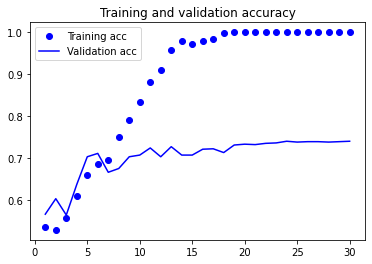

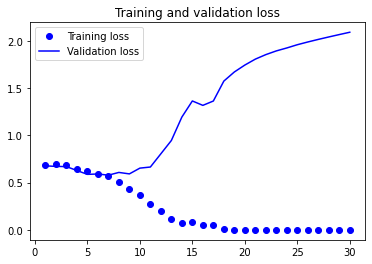

In [16]:
# 결과 확인

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')